In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from subprocess import check_output
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")


In [59]:
data=pd.read_csv('wdbc.data',header=None)

data.head()

In [60]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [61]:
headers=['id','diagnosis','mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness','mean_compactness','mean_concavity','mean_concave points','mean_symmetry','mean_fractal dimension','SE_radius','SE_texture','SE_perimeter','SE_area','SE_smoothness','SE_compactness','SE_concavity','SE_concave points','SE_symmetry','SE_fractal dimension','worst_radius','worst_texture','worst_perimeter','worst_area','worst_smoothness','worst_compactness','worst_concavity','worst_concave points','worst_symmetry','worst_fractal dimension']

In [62]:
data.to_csv('labeledData.csv',header=headers,index=False)

In [63]:
data=pd.read_csv('labeledData.csv')
data.head()

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [64]:
def diag(z):
    if z=='M':
        return 1
    else:
        return 0
z=data['diagnosis'].apply(diag)
data.diagnosis=z

In [65]:
df=pd.DataFrame(data)
df=df.drop('id',axis=1)
df

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [66]:
x=df.drop('diagnosis',axis=1)
x.shape



(569, 30)

In [67]:
y=df.iloc[:,0:1]
y.shape


(569, 1)

In [68]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:


from sklearn.preprocessing import StandardScaler
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
# performing standardization
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [70]:
from sklearn.decomposition import PCA
components=None
pca=PCA(n_components=components)
pca.fit(x_scaled)

PCA()

In [71]:
print('Cumulative Variances Percentage:')
print(pca.explained_variance_ratio_.cumsum()*100)

Cumulative Variances Percentage:
[ 45.70482024  63.43807513  72.38144906  79.00927945  84.47359555
  88.47267763  90.44353313  92.04384397  93.39708966  94.56672126
  95.5371204   96.48654887  97.35602624  98.06158498  98.53894853
  98.82464805  99.03516744  99.21059817  99.38127455  99.54166534
  99.64391818  99.74210062  99.82305224  99.8830052   99.94149718
  99.96835313  99.99168096  99.99706656  99.99955739 100.        ]


Text(0, 0.5, 'Explained variance(%)')

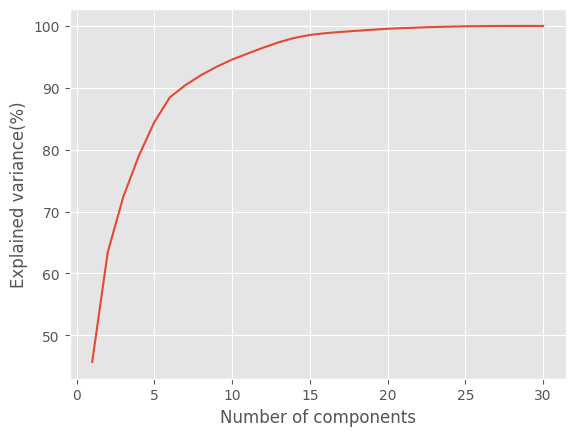

In [72]:
components=len(pca.explained_variance_ratio_)\
    if components is None else components
plt.plot(range(1,components+1),
         np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance(%)')

Cumulative Variances (Percentage):
[45.70482024 63.43807513 72.38144906 79.00927945 84.47359555 88.47267763]
Number of components:6


Text(0, 0.5, 'Explained Variance (%)')

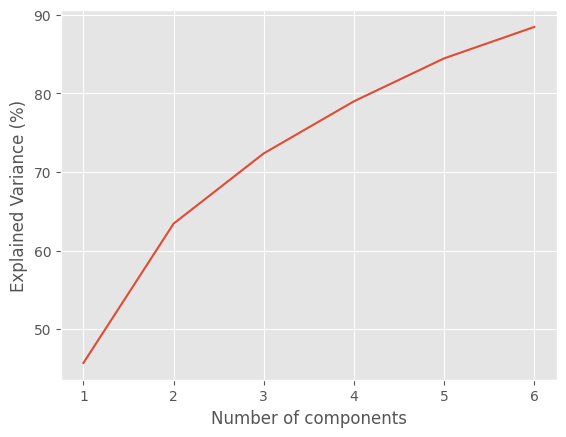

In [73]:
from sklearn.decomposition import PCA 
pca=PCA(n_components=0.85)
pca.fit(x_scaled)
print('Cumulative Variances (Percentage):')
print(np.cumsum(pca.explained_variance_ratio_*100))
components=len(pca.explained_variance_ratio_)
print(f'Number of components:{components}')
plt.plot(range(1,components+1),
np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance (%)')

In [74]:
pca_components=abs(pca.components_)
print(pca_components)

[[0.21946075 0.22327147 0.1053675  0.23103393 0.22492103 0.13445769
  0.22899318 0.25161962 0.25792787 0.13031253 0.04899745 0.20622073
  0.01582104 0.21057403 0.20387997 0.00910145 0.1582188  0.1434352
  0.17645803 0.03719747 0.08953781 0.23171618 0.10566991 0.23935141
  0.22817589 0.12069915 0.20012565 0.22073753 0.24704713 0.11695725]
 [0.07527256 0.22054497 0.05604209 0.20063176 0.21506452 0.20205704
  0.17192616 0.08570235 0.01229753 0.21196099 0.37647526 0.07087837
  0.11858407 0.05388621 0.12318004 0.2364953  0.26339904 0.23030467
  0.17047432 0.22040844 0.30600865 0.21009518 0.05035212 0.18876594
  0.20748237 0.16936642 0.14271038 0.10471416 0.00081362 0.13905316]
 [0.10381349 0.02078243 0.08656462 0.01724522 0.05956234 0.15956682
  0.10068951 0.01046439 0.03298289 0.09744592 0.06879573 0.2831986
  0.36669189 0.28069702 0.24095374 0.26840399 0.13395417 0.15592669
  0.20074335 0.24173635 0.19370193 0.01903268 0.02431895 0.02253289
  0.01916973 0.3058468  0.25009862 0.18447942 0.

In [78]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    df2=df.drop('diagnosis',axis=1)
    print(f'Component {row}: {df2.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['mean_symmetry', 'mean_concave points', 'worst_symmetry', 'worst_area']
Component 1: ['SE_radius', 'worst_radius', 'SE_concavity', 'SE_compactness']
Component 2: ['SE_perimeter', 'worst_fractal dimension', 'worst_compactness', 'SE_texture']
Component 3: ['worst_perimeter', 'mean_perimeter', 'SE_perimeter', 'mean_compactness']
Component 4: ['SE_concave points', 'mean_compactness', 'worst_compactness', 'SE_concavity']
Component 5: ['SE_fractal dimension', 'worst_fractal dimension', 'worst_compactness', 'mean_fractal dimension']


In [79]:
x_pca=pca.transform(x_scaled)
print(x_pca.shape)
print(x_pca)

(569, 6)
[[ 9.00574762  2.13297193 -1.3058032   3.58251042 -1.3601952   1.5555042 ]
 [ 2.72416163 -3.86854352 -0.06524162  1.23678875  0.36458132  0.11451479]
 [ 5.9312751  -0.77891015 -0.63084536  0.87193931 -0.1362758   0.49621953]
 ...
 [ 1.62139901 -1.8598167   0.76477174 -1.98279168  1.85452804 -0.6155452 ]
 [10.15343163  1.73263141 -1.79963412 -2.27017331  0.41465922  0.52109452]
 [-5.43024181 -0.82933047  1.65896772 -2.27087421 -0.17550628  1.72452175]]


In [465]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.3,random_state=42)

In [467]:
Rfor=RandomForestClassifier(random_state=42)
Rfor=Rfor.fit(x_train,y_train)
acc=accuracy_score(y_test,Rfor.predict(x_test))
print('Accuracy is:',acc)



Accuracy is: 0.9590643274853801


<Axes: >

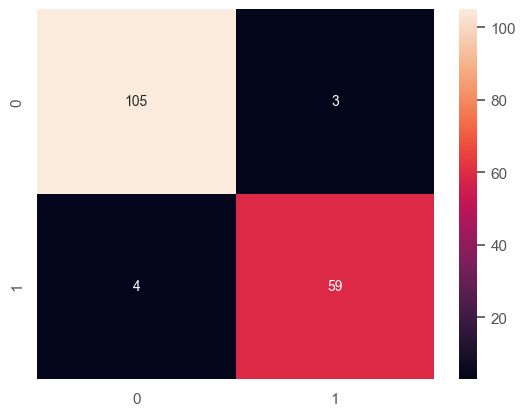

In [468]:
cm=confusion_matrix(y_test,Rfor.predict(x_test))
sns.heatmap(cm,annot=True,fmt='d')